Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,626 (92.29 KB)

 Trainable params: 23,626 (92.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7497 - loss: 0.7470
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9603 - loss: 0.1330
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9730 - loss: 0.0917
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9790 - loss: 0.0718
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9825 - loss: 0.0605
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9847 - loss: 0.0488
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9868 - loss: 0.0415
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9875 - loss: 0.0409
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9879 - loss: 0.0390
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9891 - loss: 0.0341
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9858 - loss: 0.0510
Test accuracy: 0.9891999959945679
313/313 ━━━━━━━━━━━━━━━━━━━━ 1

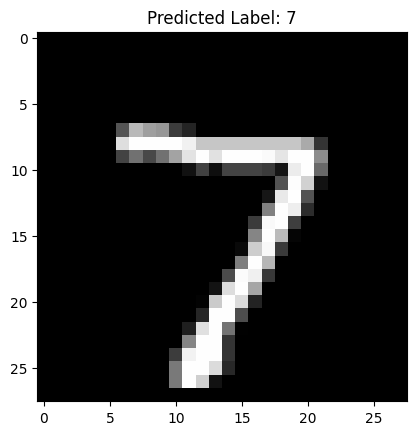

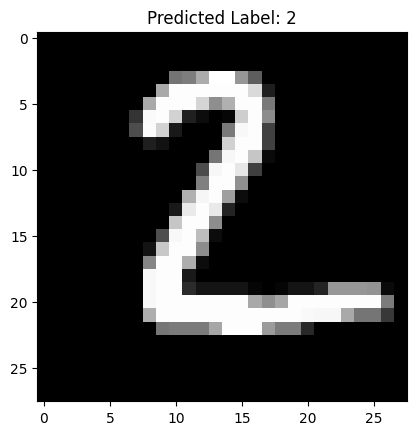

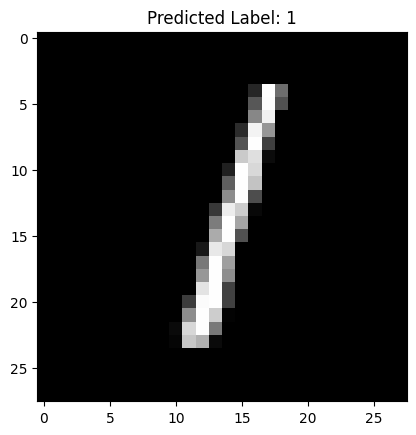

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
# A classification is changed to a binary vector
# Example clases (0,1,2);
# 0 becomes[1,0,0]
# 1 becomes[0,1,0]
# 2 becomes[0,0,1]


# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#The data set is already predivided  if not use train_test_split


# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
# The normalization of the data improve tthe eficiency of the training and the stability of the model.
# The model Converge faster and avoid numerical problems


test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


# Build the CNN model
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    #layers.AveragePooling2D((2,2))
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #layers.AveragePooling2D((2,2))
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])
model.summary()


# Compile the model
model.compile(optimizer='adam',
              # Other options of optimizer SGD (Stochastic Gradient Descent),
              #RMSprop,Adagrad, Adam,Adadelta,Nadam
              loss='categorical_crossentropy',
              #categorical_crossentropy: para clasificación multiclase.
              #binary_crossentropy: para clasificación binaria.
              #mean_squared_error: para regresión.
              #mean_absolute_error: para medir el error absoluto.
              metrics=['accuracy'])


# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=64)
#batch_size is the number of samples the network processes before updating the weights during training.


# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


# Predict and display three test images
predictions = model.predict(test_images)
for i in range(3):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted Label: {np.argmax(predictions[i])}')
    plt.show()


# Cambios hechos: reducir neuronas, aumentar epocas y agregar capa dropout para reducir overfitting
# Resultados: corre más rápido y tiene mayor precision 0.99%